In [278]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [279]:
import numpy as np
import pandas as pd
from scipy import stats
from numpy import mean

In [280]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [281]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [282]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [283]:
# reflect an existing database into a new model

measurement_data = pd.read_sql("SELECT * FROM measurement", conn)

measurement_data

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [284]:
station_data = pd.read_sql("SELECT * FROM station", conn)

station_data

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [285]:
# We can view all of the classes that automap found

Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [286]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [287]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [319]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

print("Query Date: ", query_date)

results = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date > query_date).order_by(Measurements.date).all()

results

prcp_12_months_df = pd.DataFrame(results, columns=['Date', 'PRCP',])

prcp_12_months_df = prcp_12_months_df.replace(np.nan, 0)

prcp_12_months_df.sort_values(by='Date')

prcp_12_months_df

Query Date:  2016-08-23


,Date,PRCP
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,0.00
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


Text(0, 0.5, 'Precipitation (in)')

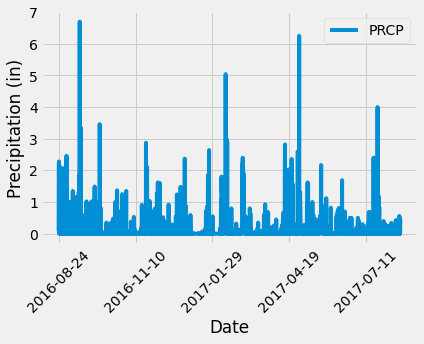

In [321]:
prcp_12_months_df.plot(x="Date",y='PRCP',rot=45)
plt.ylabel("Precipitation (in)")


In [290]:
# Calculate the date 1 year ago from the last data point in the database

one_year_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

print("Query Date: ", query_date)


Query Date:  2016-08-23


In [322]:
# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurements.station,Measurements.date,Measurements.prcp,Measurements.tobs).filter(Measurements.date > query_date).all()

results

[('USC00519397', '2016-08-24', 0.08, 79.0),
 ('USC00519397', '2016-08-25', 0.08, 80.0),
 ('USC00519397', '2016-08-26', 0.0, 79.0),
 ('USC00519397', '2016-08-27', 0.0, 77.0),
 ('USC00519397', '2016-08-28', 0.01, 78.0),
 ('USC00519397', '2016-08-29', 0.0, 78.0),
 ('USC00519397', '2016-08-30', 0.0, 79.0),
 ('USC00519397', '2016-08-31', 0.13, 80.0),
 ('USC00519397', '2016-09-01', 0.0, 81.0),
 ('USC00519397', '2016-09-02', 0.0, 80.0),
 ('USC00519397', '2016-09-03', 0.0, 79.0),
 ('USC00519397', '2016-09-04', 0.03, 75.0),
 ('USC00519397', '2016-09-05', None, 79.0),
 ('USC00519397', '2016-09-06', None, 76.0),
 ('USC00519397', '2016-09-07', 0.05, 76.0),
 ('USC00519397', '2016-09-08', 0.0, 80.0),
 ('USC00519397', '2016-09-09', 0.03, 79.0),
 ('USC00519397', '2016-09-10', 0.0, 78.0),
 ('USC00519397', '2016-09-11', 0.05, 76.0),
 ('USC00519397', '2016-09-12', 0.0, 78.0),
 ('USC00519397', '2016-09-13', 0.02, 78.0),
 ('USC00519397', '2016-09-14', 1.32, 75.0),
 ('USC00519397', '2016-09-15', 0.42, 79.0)

In [323]:
# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(results, columns=['Stations','Date','Precipitation',"Temperature"])

df = df.replace(np.nan, 0)

df = df.set_index('Date')

df

,Stations,Precipitation,Temperature
Date,,,
2016-08-24,USC00519397,0.08,79.0
2016-08-25,USC00519397,0.08,80.0
2016-08-26,USC00519397,0.00,79.0
2016-08-27,USC00519397,0.00,77.0
2016-08-28,USC00519397,0.01,78.0
...,...,...,...
2017-08-19,USC00516128,0.09,71.0
2017-08-20,USC00516128,0.00,78.0
2017-08-21,USC00516128,0.56,76.0


In [324]:
# Sort the dataframe by date

df.sort_values(by='Date')

,Stations,Precipitation,Temperature
Date,,,
2016-08-24,USC00519397,0.08,79.0
2016-08-24,USC00517948,0.00,78.0
2016-08-24,USC00519281,2.15,77.0
2016-08-24,USC00514830,2.28,80.0
2016-08-24,USC00513117,2.15,76.0
...,...,...,...
2017-08-22,USC00519523,0.00,82.0
2017-08-23,USC00519523,0.08,82.0
2017-08-23,USC00519397,0.00,81.0


In [326]:
# Use Pandas to calculate the summary statistics for the precipitation data

df.describe()

,Precipitation,Temperature
count,2223.000000,2223.000000
mean,0.159951,74.578947
std,0.441220,4.612232
min,0.000000,58.000000
25%,0.000000,71.000000
50%,0.010000,75.000000
75%,0.110000,78.000000
max,6.700000,87.000000


In [327]:
# Design a query to show how many stations are available in this dataset?

station_list = session.query(Stations)
for station in station_list:
    print(station.station)

USC00519397
USC00513117
USC00514830
USC00517948
USC00518838
USC00519523
USC00519281
USC00511918
USC00516128


In [328]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_list = session.query(Measurements.station, func.count(Measurements.station)).group_by(Measurements.station).all()

stations_df = pd.DataFrame(station_list,columns=['Station','Activity (Days)'])

stations_sorted_df = stations_df.sort_values(['Activity (Days)'],ascending=False)

stations_sorted_df

,Station,Activity (Days)
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [329]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

session.query(func.min(Measurements.tobs),func.max(Measurements.tobs),func.avg(Measurements.tobs)).\
    filter(Measurements.station == 'USC00519281').all()
    

[(54.0, 85.0, 71.66378066378067)]

In [333]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temps_12_months = session.query(Measurements.tobs).filter(Measurements.station == 'USC00519281').filter(Measurements.date > query_date).all()

temps_12_months

temps_df = pd.DataFrame(temps_12_months,columns=['Temperature'])

temps_df

,Temperature
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


Text(0.5, 0, 'Temperature Range')

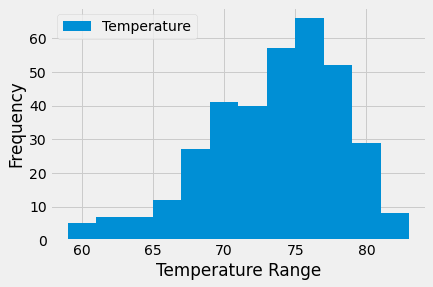

In [336]:
temps_df.plot.hist(bins=12)
plt.xlabel("Temperature Range")

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
